**CH 4 HW**

In [27]:
import math
import statistics
import numpy as np
import scipy.stats
from scipy import stats
from scipy.stats import f_oneway
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
import matplotlib.pyplot as plt

In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**4.35 a)**
Does flow rate affect etch uniformity?
Answer this question by using an analysis of
variance with Alpha = 0.05


In [29]:
T4E4 = pd.read_csv('drive/My Drive/data/Table4E4.csv', sep=',', na_values=".")
T4E4

,Flow,Uniformity
0,125,2.7
1,125,2.6
2,125,4.6
3,125,3.2
4,125,3.0
5,125,3.8
6,160,4.6
7,160,4.9
8,160,5.0
9,160,4.2


In [30]:
Flow125=T4E4[T4E4['Flow']==125]['Uniformity']
Flow160=T4E4[T4E4['Flow']==160]['Uniformity']
Flow200=T4E4[T4E4['Flow']==200]['Uniformity']

In [31]:
stat, p=f_oneway(Flow125, Flow160, Flow200)
print('stat=%.3f, p=%.3f' %(stat,p))

stat=3.586, p=0.053


H0: Tau Flow120= Tau Flow160= Tau Flow200= 0
H1: at least one tau not equal to 0 
Since the pvalue is greater than .05 (even by the tiny bit), we cannot reject the null hypothesis, they are too similar to say flow affects the etch.

**b)** Construct a box plot of the etch uniformity data.
Use this plot, together with the analysis of variance
results, to determine which gas flow rate
would be best in terms of etch uniformity (a
small percentage is best).

In [32]:
m1 = ols('Uniformity ~ C(Flow)', data=T4E4).fit()
aov_table = sm.stats.anova_lm(m1, typ=2)
aov_table


,sum_sq,df,F,PR(>F)
C(Flow),3.647778,2.0,3.585627,0.053365
Residual,7.630000,15.0,NaN,NaN


In [33]:
print(m1.summary())

                            OLS Regression Results                            
Dep. Variable:             Uniformity   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.233
Method:                 Least Squares   F-statistic:                     3.586
Date:                Fri, 23 Sep 2022   Prob (F-statistic):             0.0534
Time:                        12:40:36   Log-Likelihood:                -17.816
No. Observations:                  18   AIC:                             41.63
Df Residuals:                      15   BIC:                             44.30
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.3167      0.291     11.

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  "anyway, n=%i" % int(n))


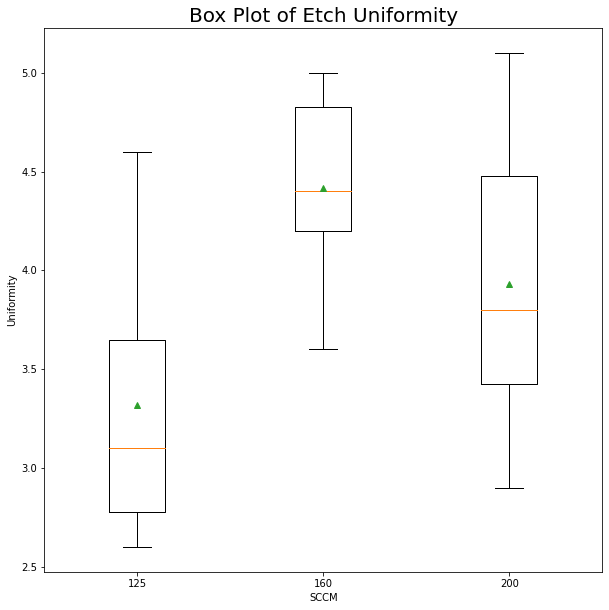

In [34]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Etch Uniformity", fontsize= 20)
ax.set

data2=[Flow125, Flow160, Flow200]

ax.boxplot(data2,
           labels= ['125', '160', '200'],
           showmeans= True)

plt.xlabel("SCCM")
plt.ylabel("Uniformity")

plt.show()

The best flow rate is 160, because the box plot shows it has the most consistent results. The box plot has the smallest range.


**c)** Plot the residuals versus predicted C2F6 flow.
Interpret this plot.

In [35]:
Unif_predict=m1.predict()
Unif_predict

array([3.31666667, 3.31666667, 3.31666667, 3.31666667, 3.31666667,
       3.31666667, 4.41666667, 4.41666667, 4.41666667, 4.41666667,
       4.41666667, 4.41666667, 3.93333333, 3.93333333, 3.93333333,
       3.93333333, 3.93333333, 3.93333333])

In [36]:
residuals=m1.resid
residuals.head()

0   -0.616667
1   -0.716667
2    1.283333
3   -0.116667
4   -0.316667
dtype: float64

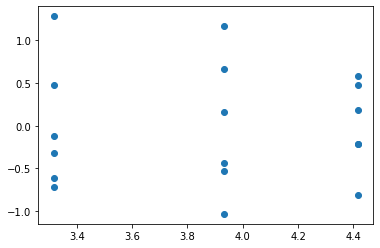

In [37]:
plt.scatter(Unif_predict, residuals)

plt.show()

Since the bars are different sizes they are not the same samples.

**d)** Does the normality assumption seem reasonable
in this problem?

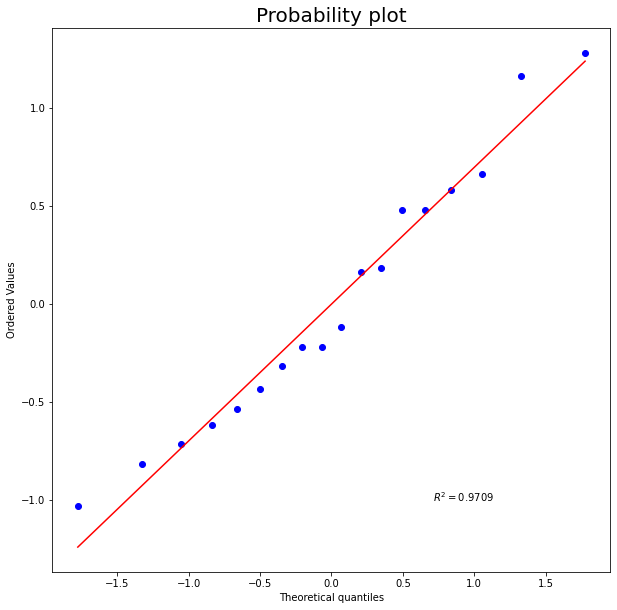

In [38]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(m1.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot", fontsize= 20)
ax.set

plt.show()

This passes the fat pencil test, so it is a uniform data set.

**4.36** Compare the mean etch uniformity values at each of
the C2F6 flow rates from Exercise 4.33 with a scaled
t distribution. Does this analysis indicate that there
are differences in mean etch uniformity at the different
flow rates? Which flows produce different
results?

**4.53 a)** Consider the Minitab output. Fill in the missing values. What conclusions
would you draw?

Z = (30-31.4) / 1.3 = -1.0769
Using a table to convert Z to P
P= 0.14007 *2 =0.28014
This is larger than 0.05 so we reject the null hypothesis

**b)** Is this a one-sided or two-sided test?

This is a two sided test as the value can be both above and below 30 to prove mu =/ 30

**c)** Use the output and a normal table to find a 95%
CI on the mean.

mean +- Z(sigma/sqrt(n))      using alpha 0.05 table to get Z value of (1.96) single sided. CI=[30.74, 32.06]






**d)** How was the SE mean calculated?

SE mean is standard deviation over the square root of sample size. In this case 1.3/(sqroot(15))= 0.336

**e)** What is the P-value if the alternative hypothesis
is H1: m > 30?

One sided P = 0.28014/2= 0.14007
To get to one sided we divide the two sided P by 2

**4.47 a)** Fit a multiple regression model to these data

In [39]:
T4E10 = pd.read_csv('drive/My Drive/data/datat10.csv', sep=',', na_values=".")
T4E10

,Brake_Horsepower,RPM,RON,Compression
0,225,2000,90,100
1,212,1800,94,95
2,229,2400,88,110
3,222,1900,91,96
4,219,1600,86,100
5,278,2500,96,110
6,246,3000,94,98
7,237,3200,90,100
8,233,2800,88,105
9,224,3400,86,97


In [40]:
model = ols('Brake_Horsepower ~ RPM + RON + Compression', T4E10).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Brake_Horsepower   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     11.12
Date:                Fri, 23 Sep 2022   Prob (F-statistic):            0.00317
Time:                        12:40:37   Log-Likelihood:                -40.708
No. Observations:                  12   AIC:                             89.42
Df Residuals:                       8   BIC:                             91.36
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -266.0312     92.674     -2.871      

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1542: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


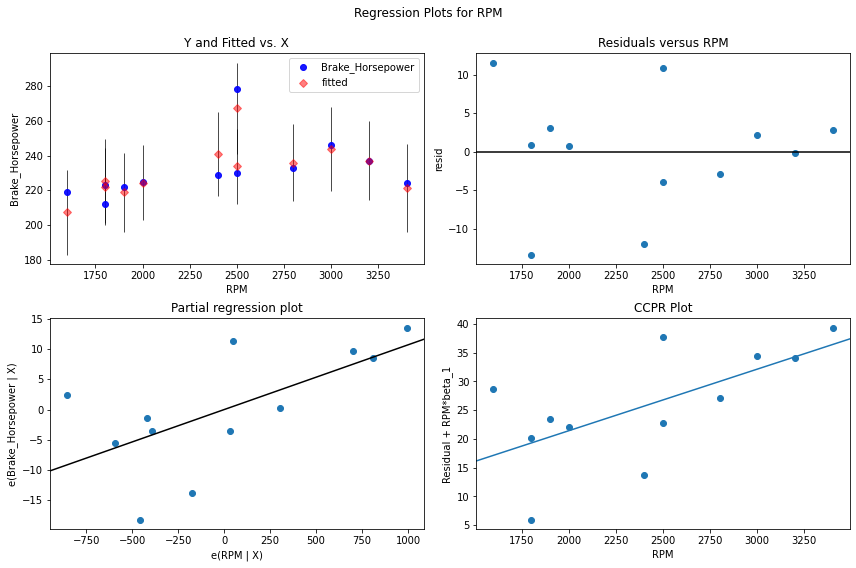

In [41]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model, 'RPM', fig=fig)

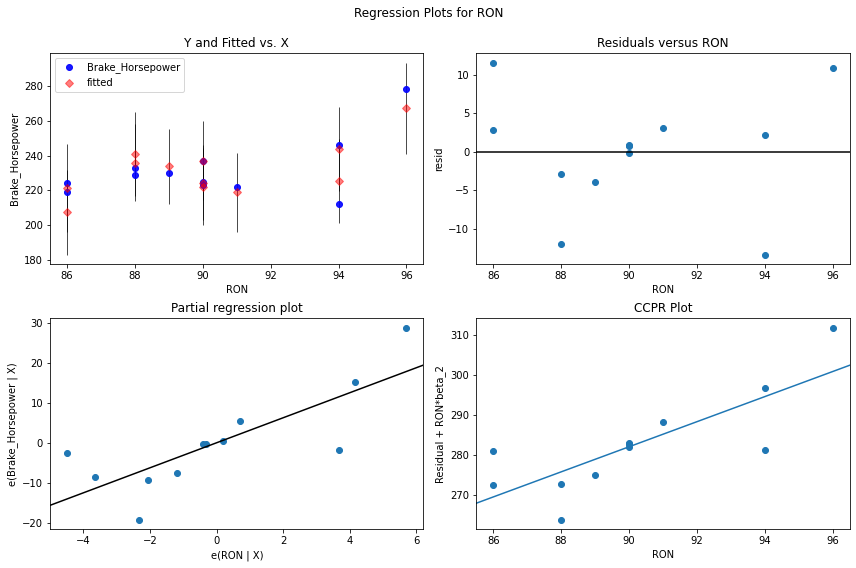

In [42]:
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'RON', fig=fig)

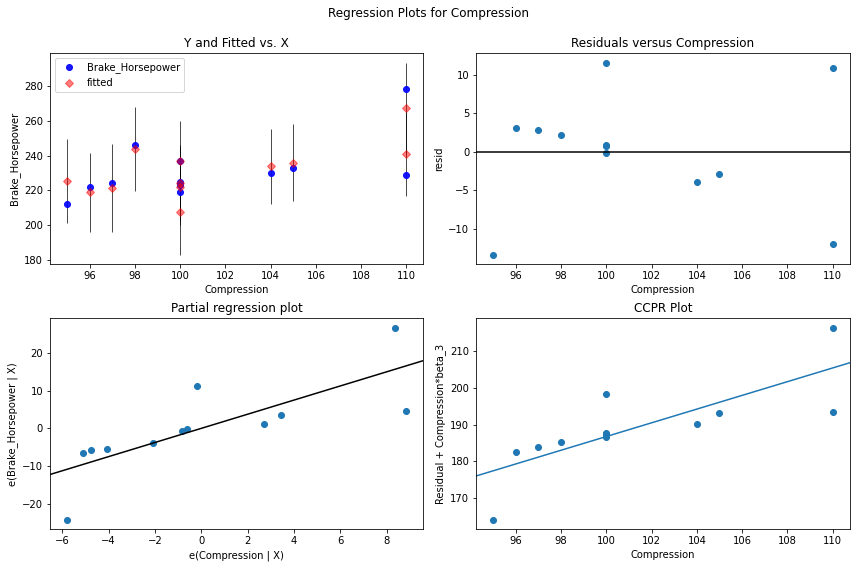

In [43]:
fig = plt.figure(figsize=(12,8))

#produce regression plots
fig = sm.graphics.plot_regress_exog(model, 'Compression', fig=fig)

**b)** Test for significance of regression. What conclusions
can you draw?

Based on the F statistic (11.12) and P value (0.00317) from the table, we can conclude that this model is significant and represents the data well with 99.7% significance.

**c)** Based on t-tests, do you need all three regressor
variables in the model?

Based on the individual P values, they all affect the Brake Horsepower. The P values are all below 0.05. RPM is 0.044, Road Octane Number is 0.006 and the Compression is 0.008. So all values are needed within the model.